In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
train_data = pd.read_csv('data/clean_data.csv')


In [3]:
unique_ratings = sorted(train_data['Rating'].unique())

# Print the sorted unique values
print(unique_ratings)

[np.float64(0.0), np.float64(1.0), np.float64(1.3), np.float64(1.5), np.float64(1.8), np.float64(2.0), np.float64(2.1), np.float64(2.2), np.float64(2.3), np.float64(2.4), np.float64(2.5), np.float64(2.6), np.float64(2.7), np.float64(2.8), np.float64(2.9), np.float64(3.0), np.float64(3.1), np.float64(3.2), np.float64(3.3), np.float64(3.4), np.float64(3.5), np.float64(3.6), np.float64(3.7), np.float64(3.8), np.float64(3.9), np.float64(4.0), np.float64(4.1), np.float64(4.2), np.float64(4.3), np.float64(4.4), np.float64(4.5), np.float64(4.6), np.float64(4.7), np.float64(4.8), np.float64(4.9), np.float64(5.0)]


In [4]:
# Basic statistics
num_users = train_data['ID'].nunique()
num_items = train_data['ProdID'].nunique()
print(f"Number of unique users: {num_users}")
print(f"Number of unique items: {num_items}")


Number of unique users: 1712
Number of unique items: 1679


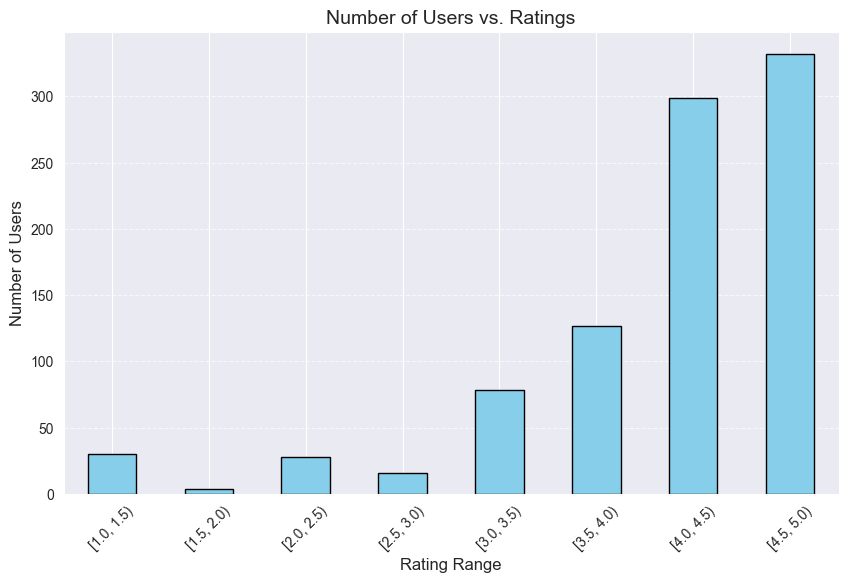

In [5]:


rating_bins = pd.cut(train_data['Rating'], bins=[1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], right=False)

# Count the number of unique users (IDs) in each bin
user_rating_counts = train_data.groupby(rating_bins, observed=True)['ID'].nunique()
# Plot the relationship
plt.figure(figsize=(10, 6))
user_rating_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.xlabel('Rating Range', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.title('Number of Users vs. Ratings', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
# Define the rating bins
rating_bins = pd.cut(train_data['Rating'], bins=[1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], right=False)

# Count the number of unique users (IDs) in each bin
user_rating_counts = train_data.groupby(rating_bins, observed=True)['ID'].nunique()

# Print the result
print(user_rating_counts)

Rating
[1.0, 1.5)     30
[1.5, 2.0)      4
[2.0, 2.5)     28
[2.5, 3.0)     16
[3.0, 3.5)     78
[3.5, 4.0)    127
[4.0, 4.5)    299
[4.5, 5.0)    332
Name: ID, dtype: int64


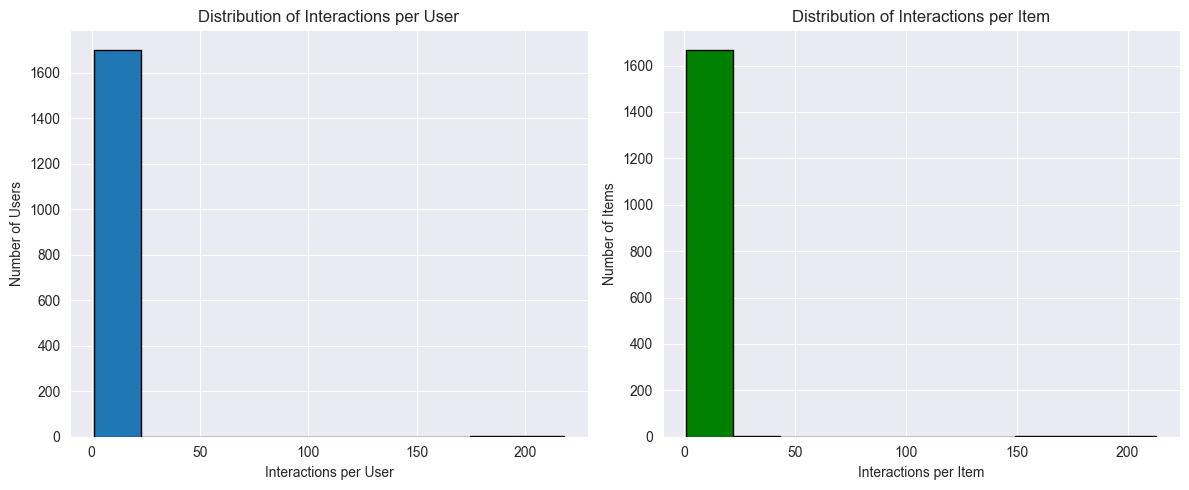

In [7]:
# Distribution of interactions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
train_data['ID'].value_counts().hist(bins=10, edgecolor='k')
plt.xlabel('Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Interactions per User')

plt.subplot(1, 2, 2)
train_data['ProdID'].value_counts().hist(bins=10, edgecolor='k',color='green')
plt.xlabel('Interactions per Item')
plt.ylabel('Number of Items')
plt.title('Distribution of Interactions per Item')

plt.tight_layout()
plt.show()

In [8]:
import pandas as pd

# Distribution of user interactions
user_interactions = train_data['ID'].value_counts()
user_bins = [0, 5, 10, 20, 30, float('inf')]
user_labels = ['[0;5)', '[5;10)', '[10;20)', '[20;30)', '30+']
user_distribution = pd.cut(user_interactions, bins=user_bins, labels=user_labels, right=False).value_counts()

# Distribution of product ratings
item_interactions = train_data['ProdID'].value_counts()
item_bins = [0, 5, 10, 20, 30, float('inf')]
item_labels = ['[0;5)', '[5;10)', '[10;20)', '[20;30)', '30+']
item_distribution = pd.cut(item_interactions, bins=item_bins, labels=item_labels, right=False).value_counts()

# Print the results
print("Distribution of users by number of interactions:")
print(user_distribution.sort_index())

print("\nDistribution of products by number of ratings:")
print(item_distribution.sort_index())


Distribution of users by number of interactions:
count
[0;5)      1611
[5;10)       18
[10;20)      71
[20;30)       2
30+          10
Name: count, dtype: int64

Distribution of products by number of ratings:
count
[0;5)      1567
[5;10)       29
[10;20)      71
[20;30)       1
30+          11
Name: count, dtype: int64
